## Importing Libraries

In [3]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Reading dataset

In [5]:
data = pd.read_csv('./A_Z Handwritten Data.csv')

## Analyzing dataset

In [26]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [36]:
data.shape

(372450, 785)

In [6]:
my_data = data.values
my_data

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0]], dtype=int64)

## Spliting x and y column

In [31]:
X = my_data[:,1:]
y = my_data[:,:1]

In [32]:
print(X.shape)
print(y.shape)

(372450, 784)
(372450, 1)


## Splitting into train and test dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#reshaping to 28*28 pixels from 784
X_train = np.reshape(X_train,(X_train.shape[0],28,28))
X_test = np.reshape(X_test,(X_test.shape[0],28,28))

In [10]:
print(X_train.shape)
print(X_test.shape)

(297960, 28, 28)
(74490, 28, 28)


In [11]:
print(y_train.shape)
print(y_test.shape)

(297960, 1)
(74490, 1)


## Random Images

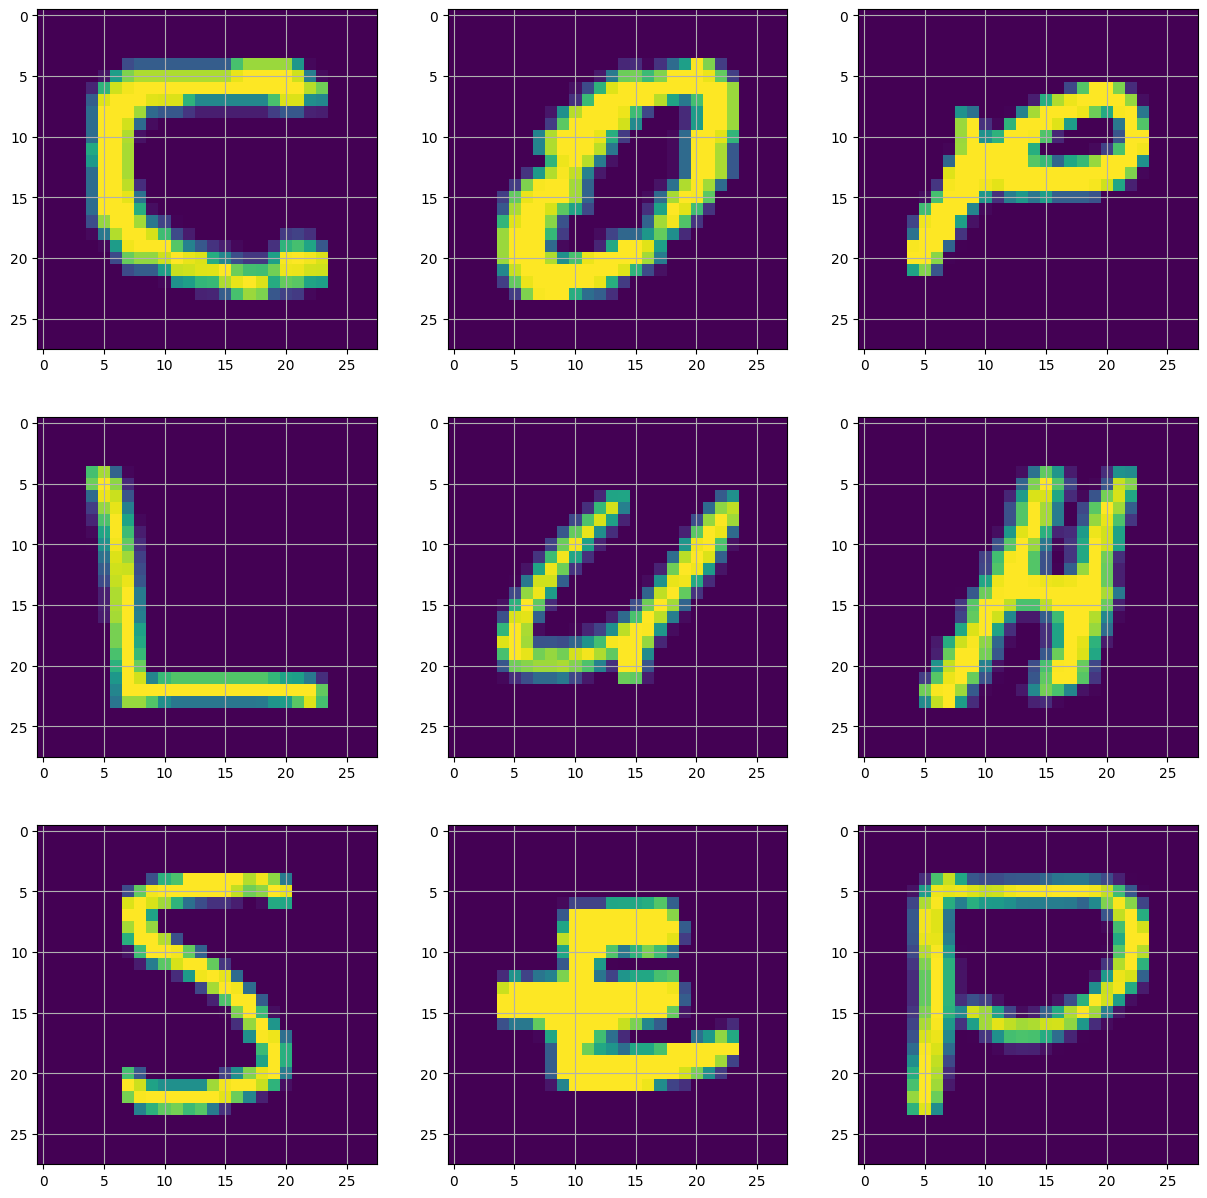

In [12]:
img_list = shuffle(X_train[:1000])
fig,ax = plt.subplots(3,3,figsize=(15,15))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(img_list[i])
    axes[i].grid()
plt.show()

## Reshaping train & test images from dataset to put in the CNN Model

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print("New shape of train and test dataset")
print(X_train.shape)
print(X_test.shape)

New shape of train and test dataset
(297960, 28, 28, 1)
(74490, 28, 28, 1)


## Downsampling the images to make them in the range of (0-1)

In [14]:
X_train = X_train/255.
X_test = X_test/255.

## Convert the int values of labels to categorical values of 26

In [16]:
# Convert training labels to categorical format
categorical_ytrain = to_categorical(y_train, num_classes=26)
print("New shape of train labels:", categorical_ytrain.shape)

# Convert testing labels to categorical format
categorical_ytest = to_categorical(y_test, num_classes=26)
print("New shape of test labels:", categorical_ytest.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


## CNN Model Architecture

In [19]:
# Initialize the model
model = Sequential()

# First Conv2D layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Second Conv2D layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Third Conv2D layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Flatten layer
model.add(Flatten())

# Dense layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Dense layer 2
model.add(Dense(64, activation='relu'))

# Final output layer with 26 nodes for 26 classes
model.add(Dense(26, activation='softmax'))

# Define the loss function to be categorical cross-entropy since it is a multi-class classification problem
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and to save the best model after every epoch:

In [21]:
# EarlyStopping callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001)

# ModelCheckpoint callback
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

### Training the model and evaluate the performance on the holdout set:

In [22]:
history = model.fit(x = X_train, y = categorical_ytrain, epochs = 100, callbacks=[es,mc], validation_data = (X_test,categorical_ytest))

Epoch 1/100
9310/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9055 - loss: 0.3288
Epoch 1: val_accuracy improved from -inf to 0.98240, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 76s 8ms/step - accuracy: 0.9055 - loss: 0.3288 - val_accuracy: 0.9824 - val_loss: 0.0661
Epoch 2/100
9309/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9823 - loss: 0.0635
Epoch 2: val_accuracy improved from 0.98240 to 0.98507, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 74s 8ms/step - accuracy: 0.9823 - loss: 0.0635 - val_accuracy: 0.9851 - val_loss: 0.0536
Epoch 3/100
9311/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9877 - loss: 0.0443
Epoch 3: val_accuracy improved from 0.98507 to 0.98895, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 72s 8ms/step - accuracy: 0.9877 - loss: 0.0443 - val_accuracy: 0.9890 - val_loss: 0.0422
Epoch 4/100
9305/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9897 - loss: 0.0365
Epoch 4: val_accurac

In [23]:
#evaluating model on test dataset
model.evaluate(X_test,categorical_ytest)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9935 - loss: 0.0409


[0.0397016666829586, 0.9935427308082581]

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,848 (1.93 MB)

 Trainable params: 168,282 (657.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,566 (1.28 MB)

## Finding accuracy, losses of Model for training and validation

In [38]:
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9935427308082581
The training accuracy is : 0.9951403141021729
The validation loss is : 0.0397016666829586
The training loss is : 0.01882406510412693


## Making prediction on test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


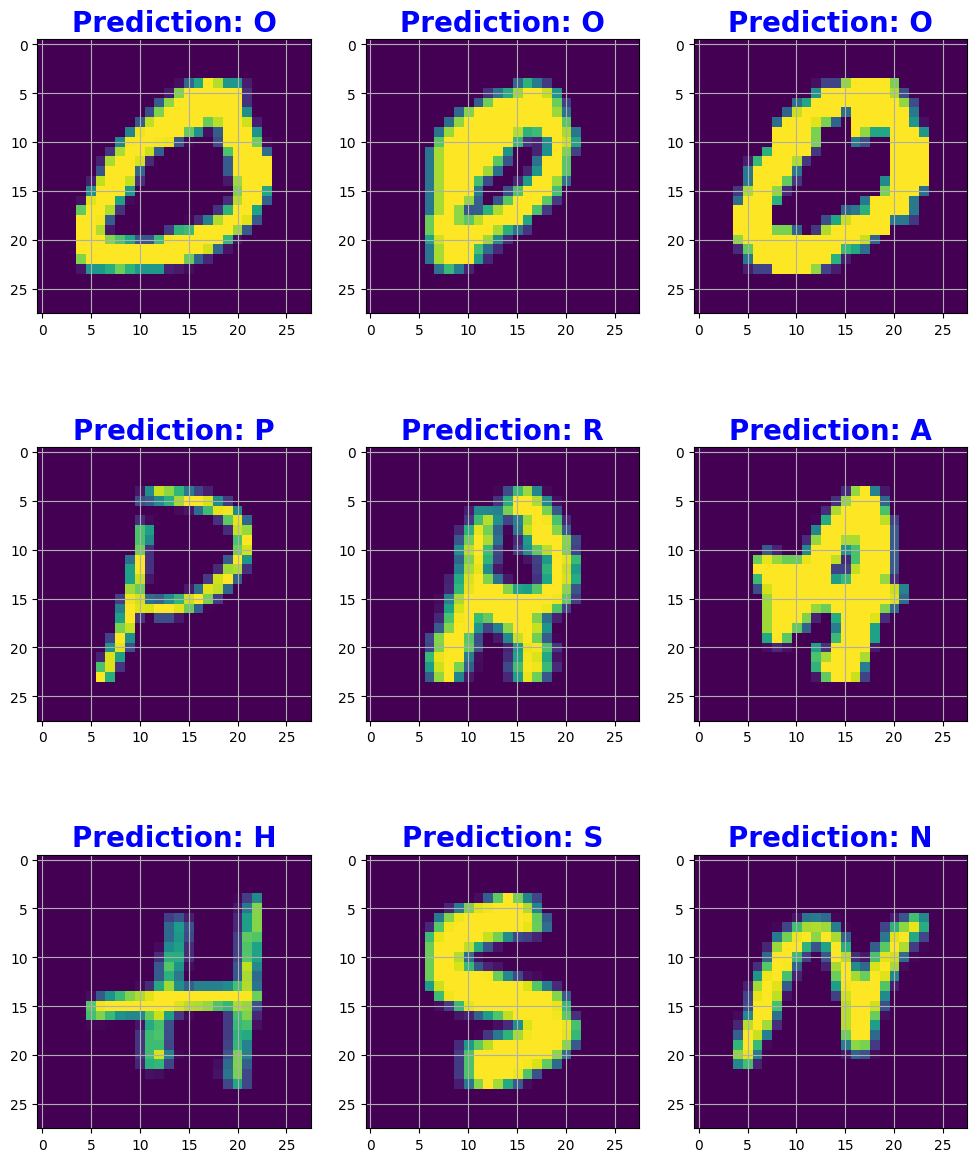

In [25]:
# Here we are creating 9 subplots of (3,3) shape & visualize some of the test dataset alphabets along with their predictions, 
# that are made using the model.predict() function for text recognition.

#creating a dictionary of letters with index
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

img_list_test = shuffle(X_test[:1000])
fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i in range(9):
    img = np.reshape(X_test[i], (28, 28))
    axes[i].imshow(img_list_test[i])
    
    pred = dict_word[np.argmax(model.predict(np.reshape(img_list_test[i],(1,28,28,1))))]
    axes[i].set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'blue')
    axes[i].grid()